In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#read in data
df = pd.read_csv("results.csv") 
df['date'] = pd.to_datetime(df['date'])
df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
winLose = df["home_score"]-df["away_score"]

# new columns are home_win, away_win, tie
df["home_win"] = winLose[winLose > 0]
df["away_win"] = winLose[winLose < 0] 
df["tie"] = winLose[winLose == 0]

# if true, value is 1, else value is 0
# Keeping it numeric makes it simple to do calcuations with
df.loc[df["home_win"] > 0,"home_win"] = 1
df.loc[df["away_win"] < 0,"away_win"] = 1
df.loc[df["tie"] == 0,"tie"] = 1
df = df.fillna(0)


In the graphs below, we compare the win rate of teams, as well as highest and lowest score based on whether it was a teams home game or an away game. 

This graph is comparing all games within the dataset used. It is clear to see that there is a good amount of correlation between wins and being the home team. Close to 50% of all games were won by home teams.

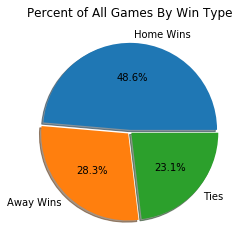

In [2]:
#plots of wins based on type
totalGames=df["home_win"].size
hWin = df["home_win"].sum()/totalGames
aWin = df["away_win"].sum()/totalGames
aTie = df["tie"].sum()/totalGames
expl = [0.02,0.03,0.02]
plt.title("Percent of All Games By Win Type")
plt.pie([hWin,aWin,aTie],labels=["Home Wins","Away Wins", "Ties"], autopct="%1.1f%%",explode=expl, shadow=True)
plt.show()

To check that it is not a fluke, when comparing the results of specific tournaments, you notice the same relationship.
For all FIFA World Cup Games, nearly 50% of all games are won by the home team.

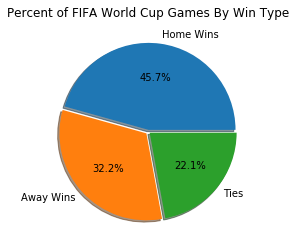

In [3]:
# FIFA Wins
FIFA = df[df["tournament"] == "FIFA World Cup"]
sFIFA = FIFA["home_win"].size
hWin = FIFA["home_win"].sum()/sFIFA
aWin = FIFA["away_win"].sum()/sFIFA
aTie = FIFA["tie"].sum()/sFIFA
plt.title("Percent of FIFA World Cup Games By Win Type")
plt.pie([hWin,aWin,aTie],labels=["Home Wins","Away Wins", "Ties"], autopct="%1.1f%%",explode=expl, shadow=True)
plt.show()

Now, looking at the max score of home and away games per year, it can be seen that the overall max scores have increased over the years. One might also observe that the overall concentration of homes scores sits just above the concentration of away scores.

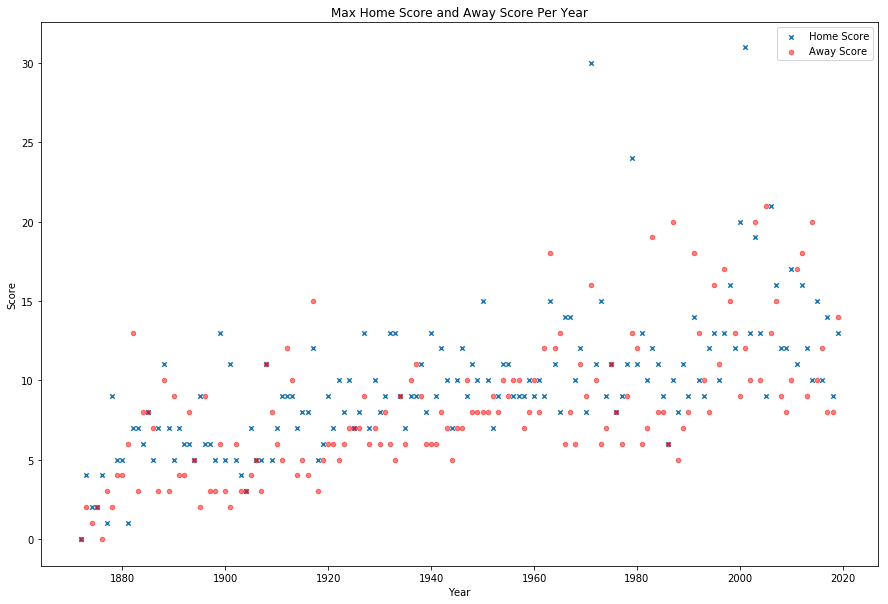

In [4]:
#Max score of every year
grouped = df.set_index(["year","home_team","away_team"],inplace=False)
maxPerYear = grouped[["home_score","away_score"]].max(level=0)
ax1 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="home_score",marker="x", figsize=(15,10))
ax2 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="away_score",color="r", alpha=0.5, ax=ax1, figsize=(15,10))
ax1.set_ylabel("Score")
ax1.set_xlabel("Year")
plt.setp(ax1,title="Max Home Score and Away Score Per Year")
ax1.legend(["Home Score","Away Score"])



Per tournmanent, you can see that the max score of Home Teams tends to be significantly higher than that of the Away Teams highest score. 

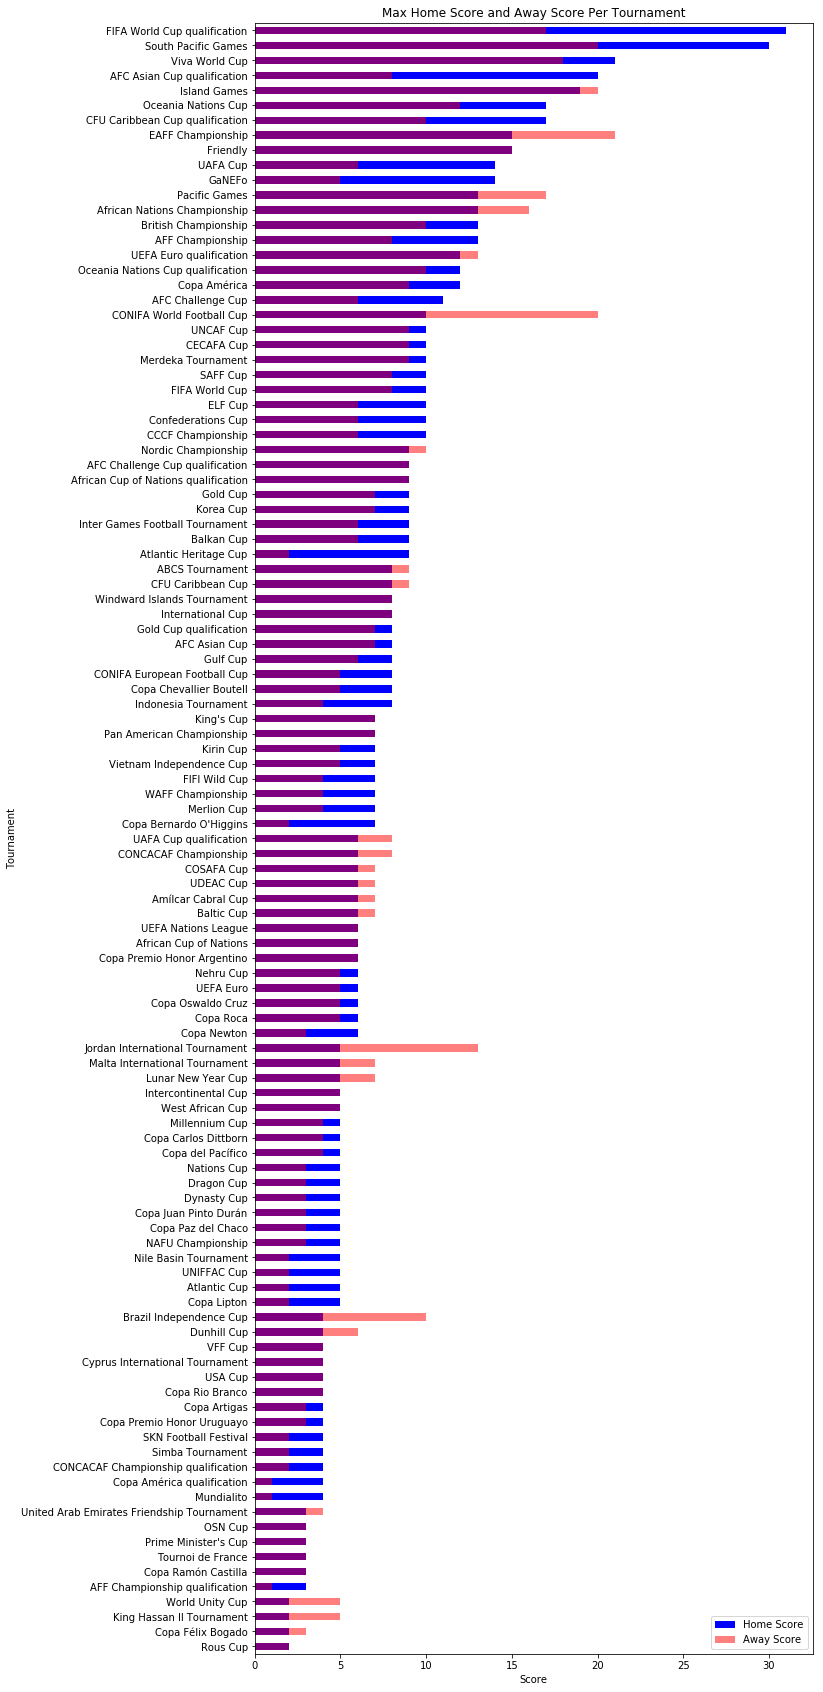

In [5]:
#Max score of every tournament
grouped = df.set_index(["tournament","year"],inplace=False)
maxPerTour = grouped[["home_score","away_score"]].max(level=0)
maxPerTour = maxPerTour.sort_values(by=["home_score","away_score"])
ax1 = maxPerTour.reset_index().plot(kind="barh",x="tournament", color = "b",y="home_score", figsize=(10,30))
ax2 = maxPerTour.reset_index().plot(kind="barh",x="tournament", y="away_score",color="r", alpha=0.5, ax=ax1, figsize=(10,30))
ax1.set_ylabel("Tournament")
ax1.set_xlabel("Score")
plt.setp(ax1,title="Max Home Score and Away Score Per Tournament")
ax1.legend(["Home Score","Away Score"])

Less notably, you can see the lowest score of every year, regardless of being the home or away team, is zero.

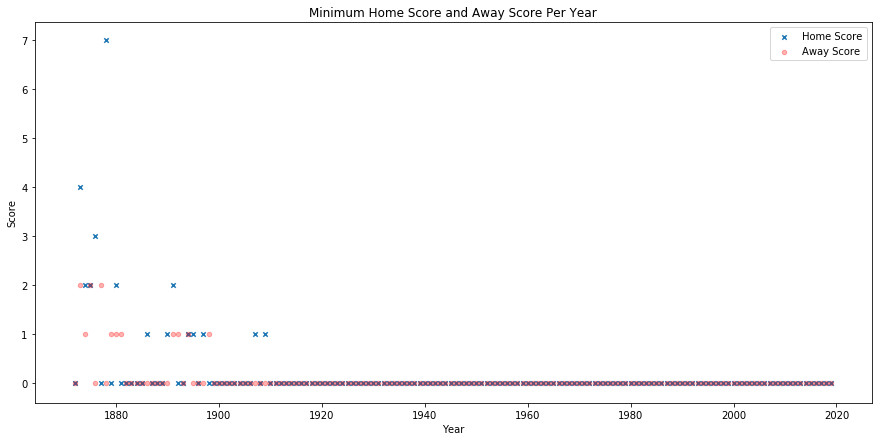

In [6]:
#Min score of every year
grouped = df.set_index(["year","home_team","away_team"],inplace=False)
maxPerYear = grouped[["home_score","away_score"]].min(level=0)
ax1 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="home_score",marker="x",figsize=(15,7))
ax2 = maxPerYear.reset_index().plot(kind="scatter",x="year", y="away_score",color="r", alpha=0.3,ax=ax1, figsize=(15,7))
ax1.set_ylabel("Score")
ax1.set_xlabel("Year")
plt.setp(ax1,title="Minimum Home Score and Away Score Per Year")
ax1.legend(["Home Score","Away Score"])

You can observe the same from the lowest score per tournament. Most tournaments have zero as the lowest score form both home and away teams.

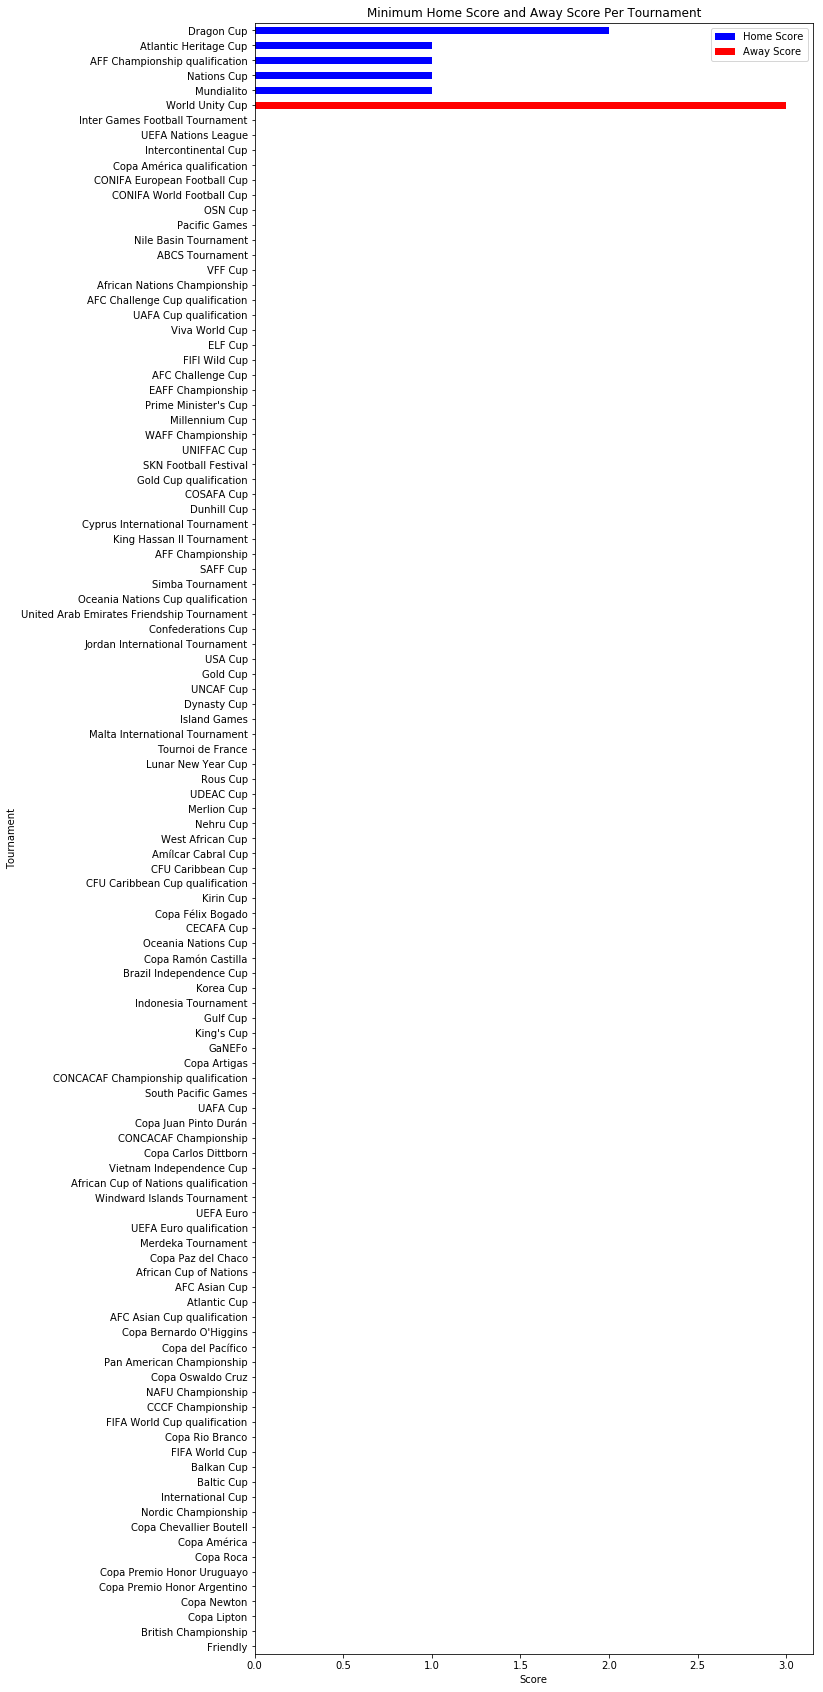

In [7]:
#Min score of every tournament
grouped = df.set_index(["tournament","year"],inplace=False)
maxPerTour = grouped[["home_score","away_score"]].min(level=0)
maxPerTour = maxPerTour.sort_values(["home_score","away_score"])
ax1 = maxPerTour.reset_index().plot(kind="barh",x="tournament", color = "b",y="home_score", figsize=(10,30))
ax2 = maxPerTour.reset_index().plot(kind="barh",x="tournament", y="away_score",color="r", ax=ax1, figsize=(10,30))
ax1.set_ylabel("Tournament")
ax1.set_xlabel("Score")
plt.setp(ax1,title="Minimum Home Score and Away Score Per Tournament")
ax1.legend(["Home Score","Away Score"])

In [20]:
print(df.head(10))

        date home_team away_team  home_score  away_score tournament     city  \
0 1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1 1873-03-08   England  Scotland           4           2   Friendly   London   
2 1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3 1875-03-06   England  Scotland           2           2   Friendly   London   
4 1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
5 1876-03-25  Scotland     Wales           4           0   Friendly  Glasgow   
6 1877-03-03   England  Scotland           1           3   Friendly   London   
7 1877-03-05     Wales  Scotland           0           2   Friendly  Wrexham   
8 1878-03-02  Scotland   England           7           2   Friendly  Glasgow   
9 1878-03-23  Scotland     Wales           9           0   Friendly  Glasgow   

    country  neutral  year  month  home_win  away_win  tie  
0  Scotland    False  1872     11       0.0       0.0  1.0

In [9]:
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,home_win,away_win,tie
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,0.0,0.0,1.0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,1.0,0.0,0.0
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,1.0,0.0,0.0
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,0.0,0.0,1.0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,1.0,0.0,0.0
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,1876,3,1.0,0.0,0.0
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,1877,3,0.0,1.0,0.0
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False,1877,3,0.0,1.0,0.0
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,1878,3,1.0,0.0,0.0
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False,1878,3,1.0,0.0,0.0


A small subset of the dataset can be seen in the following table. The data shown is after the ‘date’ cleaning steps and column additions described previously were completed. 

In [19]:
no_month = df[['country', 'home_score', 'away_score', 'year', 'home_win', 'away_win', 'tie']]

no_month.describe()

,home_score,away_score,year,home_win,away_win,tie
count,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000,40839.000000
mean,1.745709,1.188105,1989.949044,0.486398,0.282671,0.230931
std,1.749145,1.405120,24.182304,0.499821,0.450303,0.421434
min,0.000000,0.000000,1872.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1977.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1997.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2008.000000,1.000000,1.000000,0.000000
max,31.000000,21.000000,2019.000000,1.000000,1.000000,1.000000


Giving some basic statistics for the overall dataset: 40,839 rows describing individual games were used covering years from 1872 to 2019. 

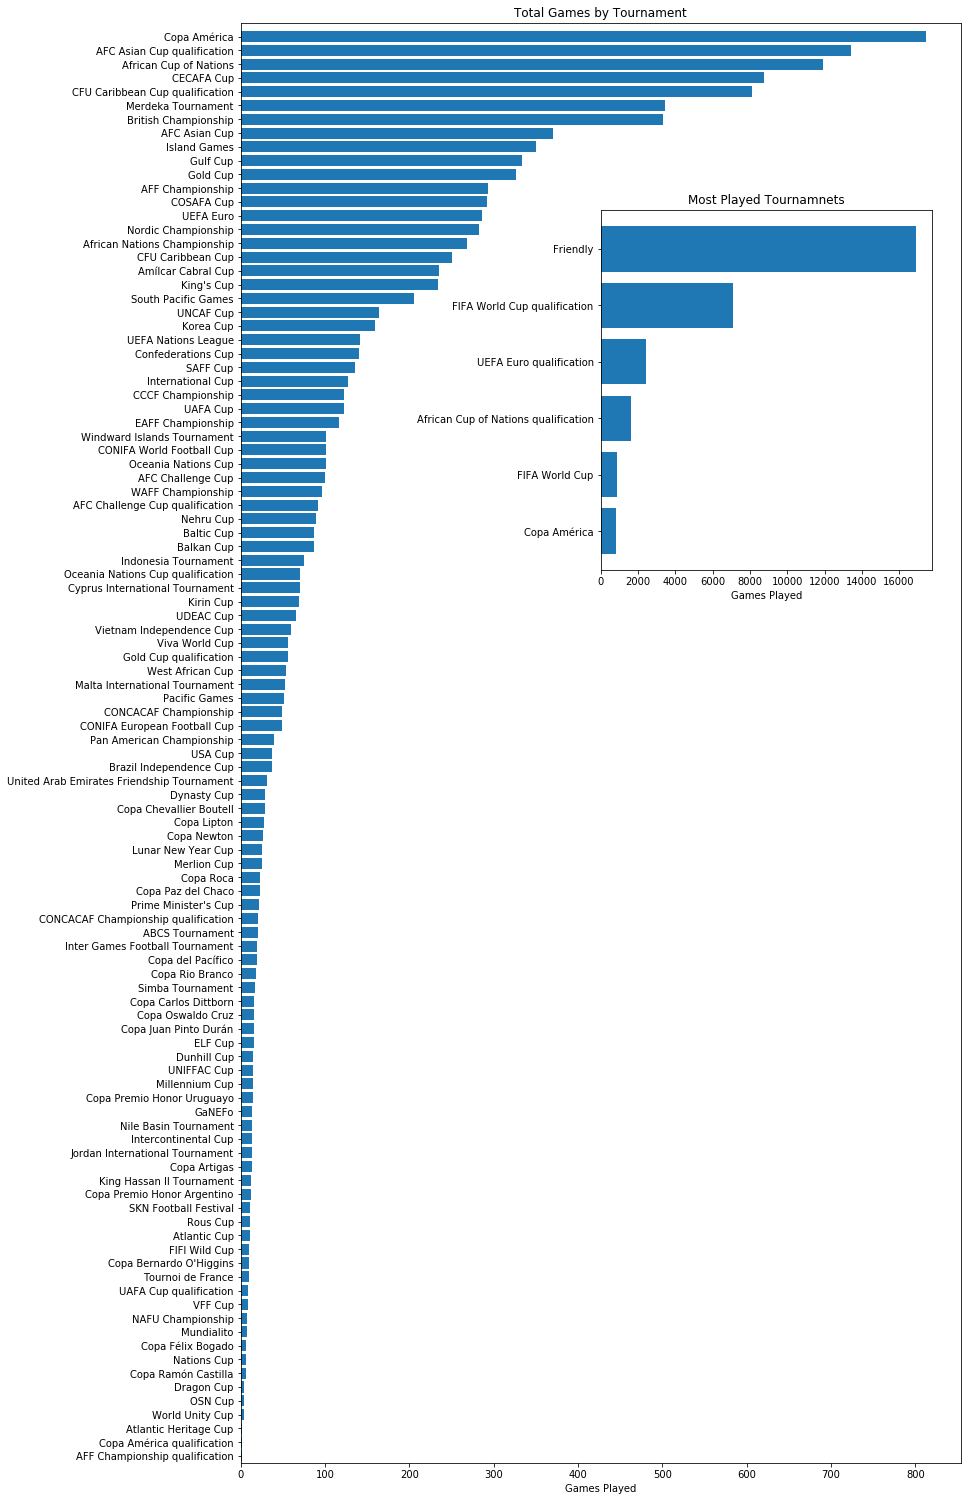

count      109.000000
mean       374.669725
std       1760.569516
min          2.000000
25%         15.000000
50%         49.000000
75%        142.000000
max      16911.000000
dtype: float64

In [22]:
tournament_counts = pd.value_counts(df['tournament'].values, sort=True)

fig = plt.figure(figsize=(10,20))
ax = fig.add_axes([0.1,0.1,1,1])
in_ax = fig.add_axes([0.6,0.72,0.46,0.25])

ax.barh(tournament_counts[-1:4:-1].index, tournament_counts[-1:4:-1].values)
ax.set_ylim(-0.5,len(tournament_counts[5:]))
ax.set_title('Total Games by Tournament')
ax.set_xlabel('Games Played')
in_ax.barh(tournament_counts[5::-1].index, tournament_counts[5::-1])
in_ax.set_title('Most Played Tournamnets')
in_ax.set_xlabel('Games Played')
plt.show()
tournament_counts.describe()

A total of 374 different tournaments are recorded in the dataset. The range of games per tournament are from a minimum of 2 games for the AFF Championship qualification to 16,911 games in the Friendly Tournament across the entire dataset.

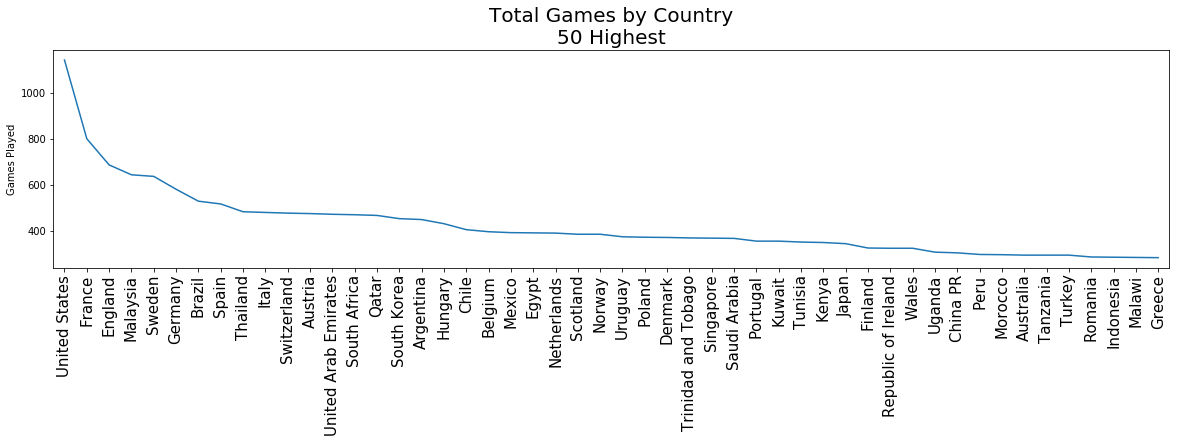

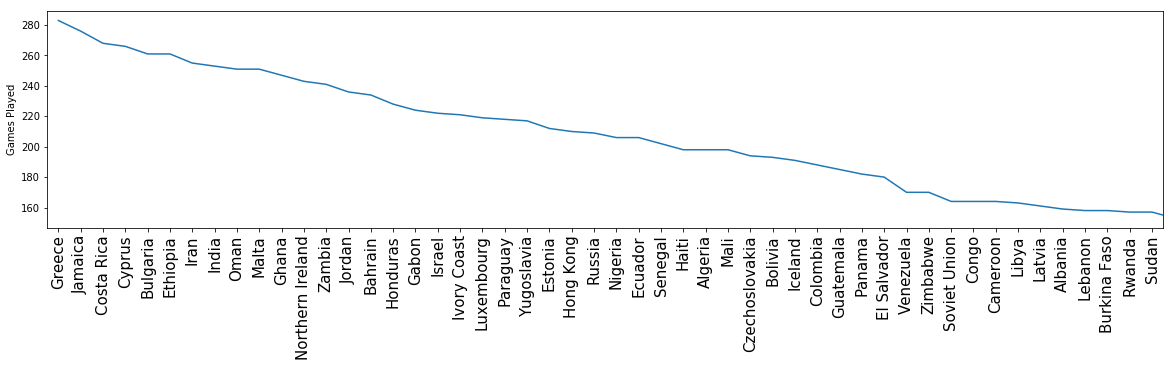

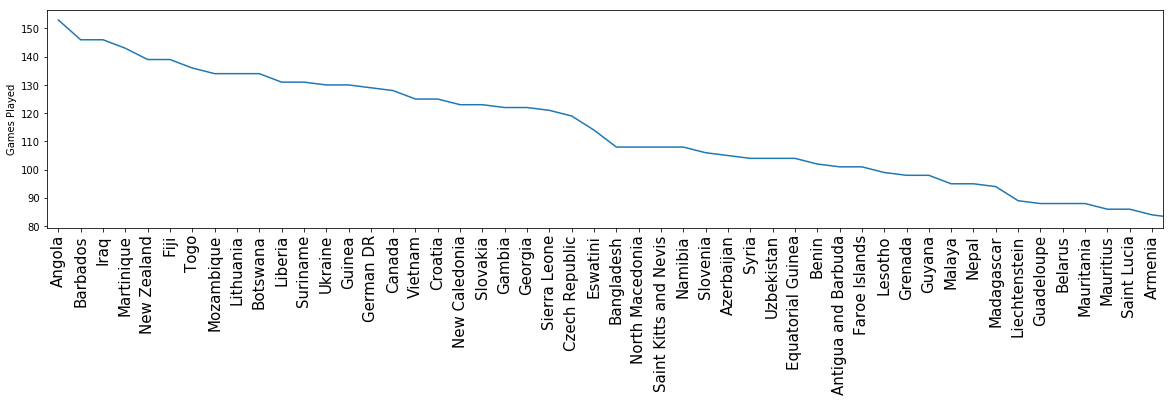

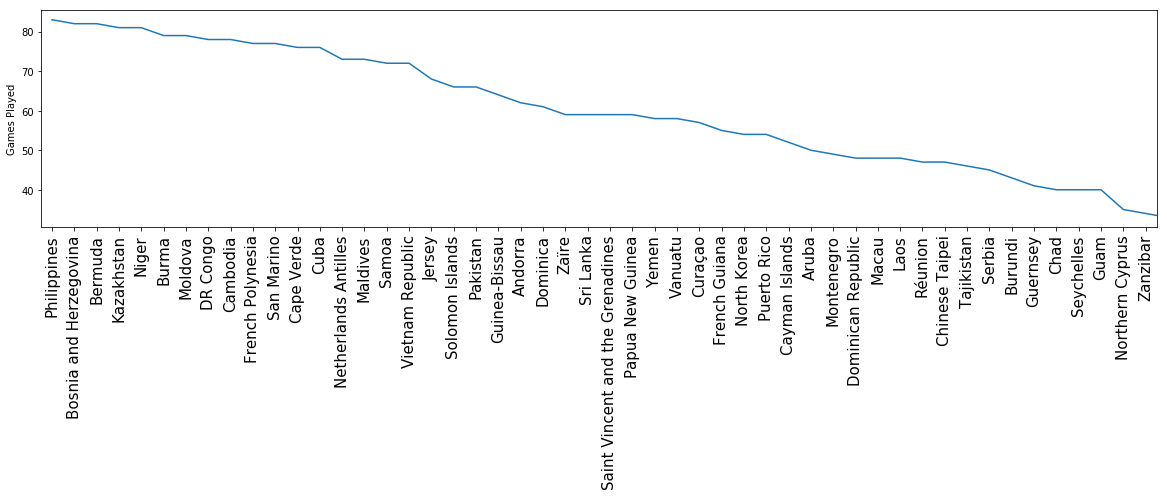

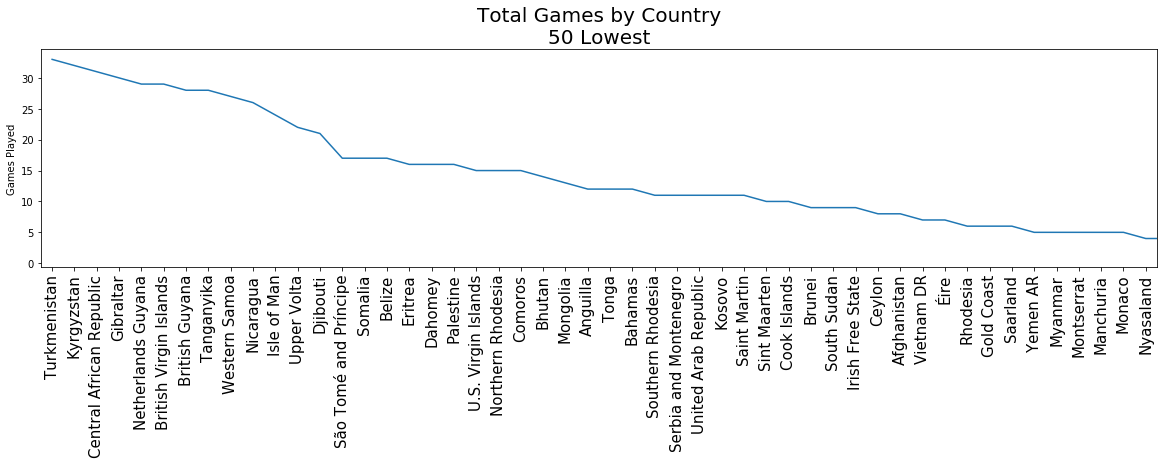

count     266.000000
mean      153.530075
std       160.946262
min         1.000000
25%        33.250000
50%       103.000000
75%       221.750000
max      1144.000000
Name: country, dtype: float64

In [24]:
country_counts = pd.value_counts(df['country'], sort=True)

plt.figure(figsize=(20,4))
plt.plot(country_counts[:50].index, country_counts[:50].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90,size=15)
plt.title('Total Games by Country\n50 Highest', size=20)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[49:100].index, country_counts[49:100].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90,size=15)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[99:150].index, country_counts[99:150].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90,size=15)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[149:200].index, country_counts[149:200].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90,size=15)
plt.ylabel('Games Played')
plt.show()
plt.figure(figsize=(20,4))
plt.plot(country_counts[199:].index, country_counts[199:].values)
plt.xlim(-0.5,49.5)
plt.xticks(rotation = 90,size=15)
plt.title('Total Games by Country\n50 Lowest', size=20)
plt.ylabel('Games Played')
plt.show()
country_counts.describe()

A total of 266 countries are represented in the dataset. Countries have played a range of games from a max of 1,144 by the United States and a minimum of 1 by Nyasaland. 

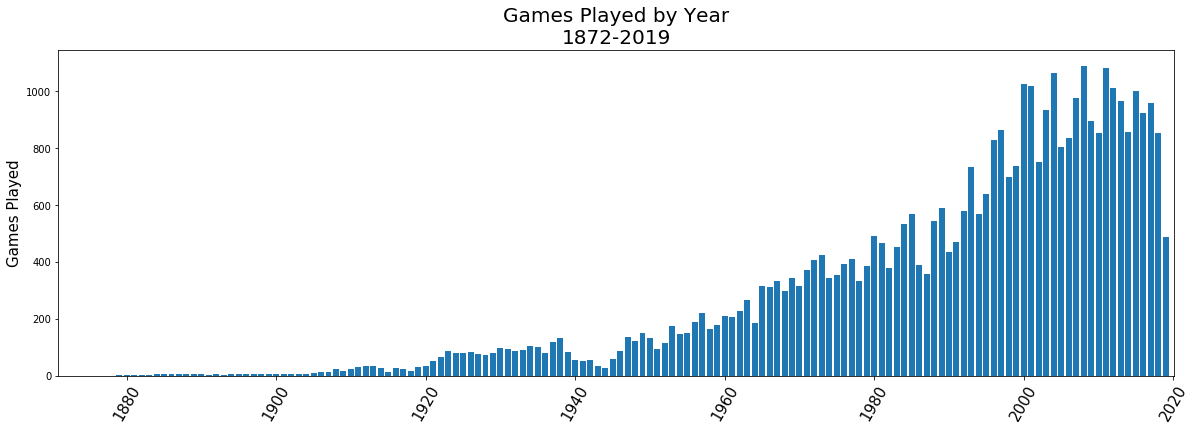

count     148.000000
mean      275.939189
std       325.421302
min         1.000000
25%        16.750000
50%       111.000000
75%       428.500000
max      1091.000000
Name: year, dtype: float64

In [30]:
games_year = pd.value_counts(df['year'])

plt.figure(figsize=(20,6))
plt.bar(games_year.index, games_year.values)
plt.title('Games Played by Year\n1872-2019', size=20)
plt.xticks(rotation=60,size=15)
plt.ylabel('Games Played', size=15)
plt.margins(x=0.005)
plt.show()
games_year.describe()

Across 147 years the graph below describes the number of games played per year. Interestingly, the number of games per year seems to have risen steadily. However, since the year 2000 it appears that the number of games per year has remained nearly constant. The spikes in games per year every four years from the 1980s to 2019 is due to the World Cup Tournament, held every four years. 

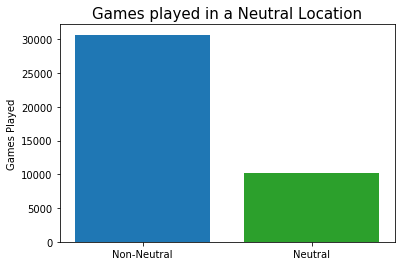

count     40839
unique        2
top       False
freq      30680
Name: neutral, dtype: object
count        2.000000
mean     20419.500000
std      14510.538257
min      10159.000000
25%      15289.250000
50%      20419.500000
75%      25549.750000
max      30680.000000
Name: neutral, dtype: float64


In [29]:
games_neutral = pd.value_counts(df['neutral'])

plt.bar(['Non-Neutral', 'Neutral'], games_neutral.values, color=['tab:blue', 'tab:green'])
plt.ylabel('Games Played')
plt.title('Games played in a Neutral Location',size=15)
plt.show()
print(df['neutral'].describe())
print(games_neutral.describe())

In 40,839 games, 10,159 games were played at a neutral venue outside either team’s country

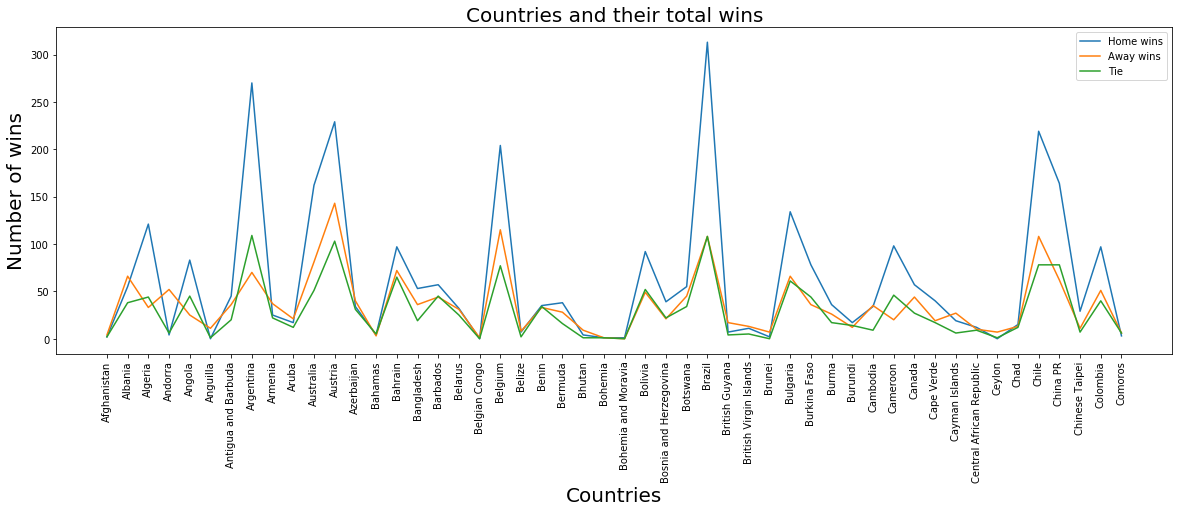

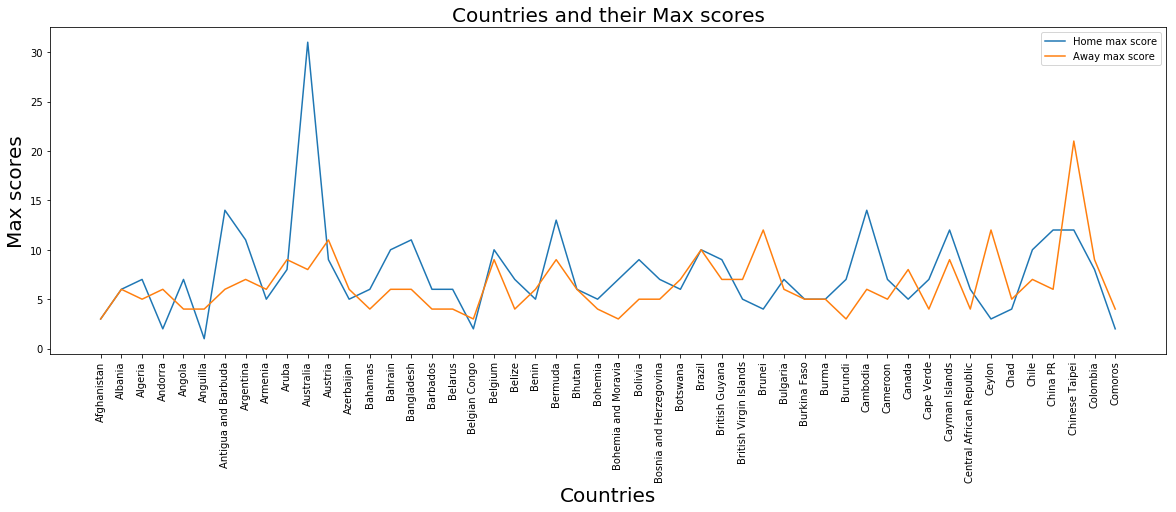

In [14]:
plt.figure(figsize=(20,6)) #(60,6) for all
#print("Countries participated:")
#print(df["country"].nunique())
df_home_win = df["home_win"].groupby(df["country"]).sum()
df_away_win = df["away_win"].groupby(df["country"]).sum()
df_tie = df["tie"].groupby(df["country"]).sum()
plt.plot(df_home_win[:50]) 
plt.plot(df_away_win[:50])
plt.plot(df_tie[:50])
plt.title("Countries and their total wins",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Number of wins",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home wins","Away wins","Tie"])
plt.show()
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_max = df["home_score"].groupby(df["country"]).max()
df_away_max = df["away_score"].groupby(df["country"]).max()
plt.plot(df_home_max[:50]) 
plt.plot(df_away_max[:50])
plt.title("Countries and their Max scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Max scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home max score","Away max score"])
plt.show()

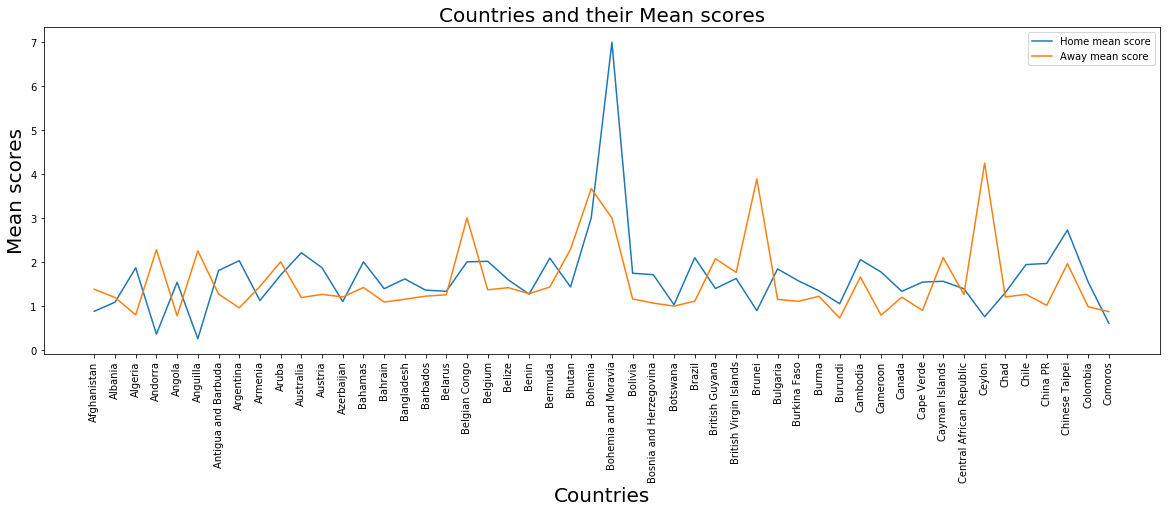

In [15]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_mean = df["home_score"].groupby(df["country"]).mean()
df_away_mean = df["away_score"].groupby(df["country"]).mean()
plt.plot(df_home_mean[:50]) 
plt.plot(df_away_mean[:50])
plt.title("Countries and their Mean scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Mean scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home mean score","Away mean score"])
plt.show()

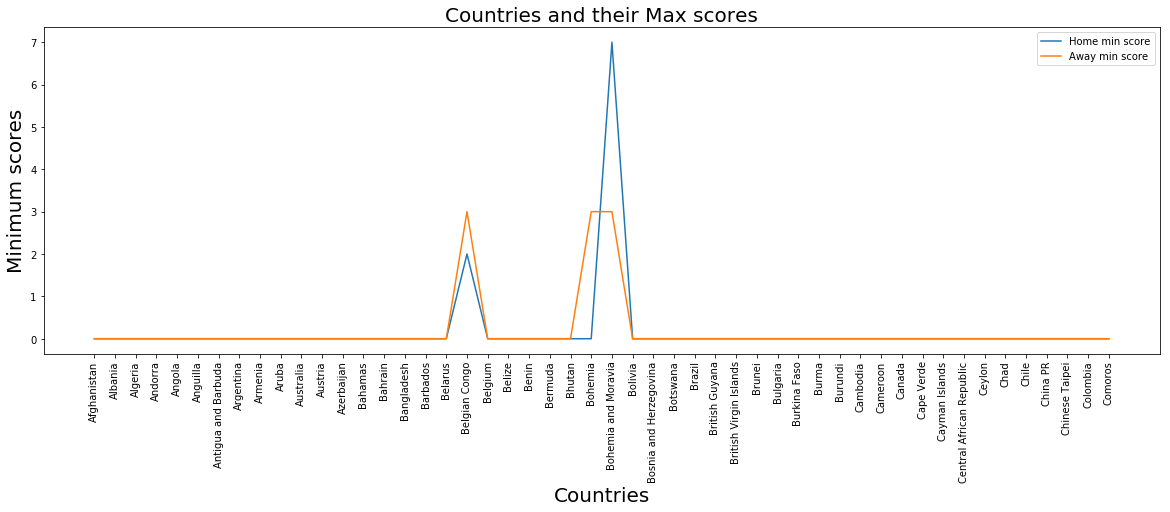

In [16]:
plt.figure(figsize=(20,6)) #(60,6) for all
df_home_min = df["home_score"].groupby(df["country"]).min()
df_away_min = df["away_score"].groupby(df["country"]).min()
plt.plot(df_home_min[:50]) 
plt.plot(df_away_min[:50])
plt.title("Countries and their Max scores",size = 20)
plt.xlabel("Countries",size = 20)
plt.ylabel("Minimum scores",size = 20)
plt.xticks(rotation = 90)
plt.legend(["Home min score","Away min score"])
plt.show()

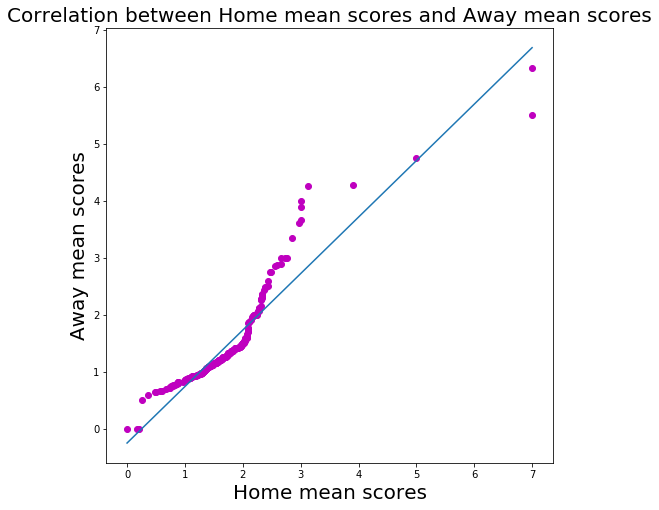

In [17]:
plt.figure(figsize=(8,8))
df_home_mean_sort = df_home_mean.sort_values(ascending=False)
df_away_mean_sort = df_away_mean.sort_values(ascending=False)
plt.scatter(df_home_mean_sort,df_away_mean_sort,c='m')
plt.title("Correlation between Home mean scores and Away mean scores",size = 20)
plt.xlabel("Home mean scores",size = 20)
plt.ylabel("Away mean scores",size = 20)
z = np.polyfit(df_home_mean_sort,df_away_mean_sort,1)
p = np.poly1d(z)
plt.plot(df_home_mean_sort,p(df_home_mean_sort))
plt.show()

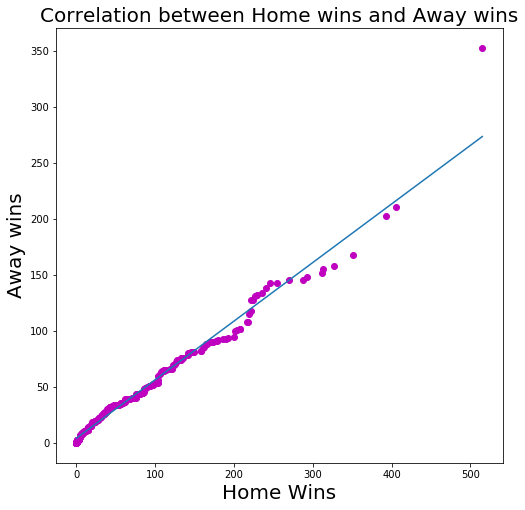

In [18]:
plt.figure(figsize=(8,8))
df_home_win_sort = df_home_win.sort_values(ascending=False)
df_away_win_sort = df_away_win.sort_values(ascending=False)
plt.scatter(df_home_win_sort,df_away_win_sort,c='m')
plt.title("Correlation between Home wins and Away wins",size = 20)
plt.xlabel("Home Wins",size = 20)
plt.ylabel("Away wins",size = 20)
z = np.polyfit(df_home_win_sort,df_away_win_sort,1)
p = np.poly1d(z)
plt.plot(df_home_win_sort,p(df_home_win_sort))
plt.show()